# ALeRCE API retrieval examples

Load libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os, sys

import requests
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd
import seaborn as sns
#from pandas.io.json import json_normalize

#from collections import OrderedDict

from astropy.time import Time
from datetime import datetime
from IPython.display import HTML

import astropy.units as u
from astropy import coordinates

#from astroquery.ned import Ned
#from astroquery.simbad import Simbad
#from astropy.time import Time

#import json

from alerce.api import AlerceAPI

#!pip install psycopg2-binary
import psycopg2

from io import StringIO

/home/rodrigo/anaconda3/envs/tf1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import time
from astropy.time import Time

In [4]:
now = Time(datetime.utcnow(), scale='utc').datetime
now_mjd = Time(datetime.utcnow(), scale='utc').mjd

# Get fresh list of SNe sent to TNS by ZTF

In [5]:
def dourl(searchweb, searchoptions):
    url = searchweb
    for key in searchoptions.keys():
        url = "%s&%s=%s" % (url, key, searchoptions[key])
    return url

In [6]:
def get_tns_df(searchoptions):
    urlpage = dourl(searchweb,searchoptions)
    print(urlpage)
    s = requests.Session()
    response = s.get(urlpage)
    response.close()
    df = pd.read_csv(StringIO(response.text))
    urls = [f"http://alerce.online/object/{oid}" for oid in df['Disc. Internal Name']]
    df['url'] = urls
    return df

In [7]:
searchweb = "https://wis-tns.weizmann.ac.il/search?"
searchoptions = {
    "reporting_groupid[]": 48, # ALeRCE 48 ZTF
    #"groupid": 74,
    #"discovery_data_source_id" : "48", # ZTF
    "num_page" : 500,  # 500 number of rows per page
    "format" : "csv",
    "display[remarks]":1,
}

In [8]:
all_alerce = []
page = 0
while True:
    print("Loading TNS page %i..." % page)
    searchoptions["page"] = page
    temp = get_tns_df(searchoptions)
    all_alerce.append(temp)
    if temp.shape[0] < 500:
        break
    page += 1
all_alerce = pd.concat(all_alerce)

Loading TNS page 0...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=0
Loading TNS page 1...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=1
Loading TNS page 2...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=2
Loading TNS page 3...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=3
Loading TNS page 4...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=4
Loading TNS page 5...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=5
Loading TNS page 6...
https://wis-tns.weizmann.ac.il/search?&reporting_groupid[]=48&num_page=500&format=csv&display[remarks]=1&page=6
Loading TNS page 7...
https://wis-tns.weizmann.ac.il/search?&r

In [9]:
all_alerce.shape

(8375, 25)

In [10]:
all_alerce.head()

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,url
0,55254,AT 2020eas,10:51:41.300,-10:38:52.53,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,20.01,g-ZTF,2020-02-16 09:07:50.016,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF20aaovpbz
1,55244,AT 2020eai,04:59:08.054,+04:58:21.78,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.57,g-ZTF,2020-03-05 03:23:05.856,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aaskdhj
2,55243,AT 2020eah,01:54:59.518,+39:25:36.71,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.30,g-ZTF,2020-03-05 03:09:35.424,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aaskblh
3,55242,AT 2020eag,06:02:17.862,-26:43:39.26,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,18.97,g-ZTF,2020-02-26 03:34:03.360,ZTF_AMPEL_COMPLETE,NaN,NaN,http://alerce.online/object/ZTF20aarbvey
4,55241,AT 2020eaf,02:58:19.979,+40:55:23.39,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,17.13,g-ZTF,2020-03-05 02:52:16.032,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF20aasjzhg


In [11]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

In [12]:
sent = list(all_alerce["Disc. Internal Name"].values)

In [5]:
retracted = pd.read_csv("retracted.txt").oid.to_list()

### Remove retracted

In [5]:
all_alerce = all_alerce[~all_alerce["Disc. Internal Name"].isin(retracted)]

NameError: name 'all_alerce' is not defined

In [6]:
all_alerce.to_pickle("all_ztf.pkl")


NameError: name 'all_alerce' is not defined

In [6]:
all_alerce = pd.read_pickle("all_ztf.pkl")
retracted = pd.read_csv("retracted.txt").oid.to_list()
sent = list(all_alerce["Disc. Internal Name"].values)

In [7]:
classified_mask = ~(all_alerce["Classifying Group/s"].isna())

In [8]:
np.sum(classified_mask)

1766

In [9]:
all_alerce.iloc[0]["Name"].split(" ")[-1]

'2020eas'

# all_alerce[classified_mask]["Obj. Type"].value_counts()


SN Ia                1215
SN II                 175
CV                     72
SN Ia-91T-like         50
SN IIn                 39
SN Ic                  26
SN IIb                 20
SN IIP                 20
SLSN-II                19
SLSN-I                 18
SN Ib                  17
SN Ic-BL               14
SN Ia-pec              12
AGN                    11
Varstar                 8
SN Ia-91bg-like         7
Galaxy                  6
SN Ibn                  5
SN                      4
SN Ib/c                 4
M dwarf                 3
TDE                     3
SN Ia-CSM               2
SN Iax[02cx-like]       2
QSO                     1
Afterglow               1
Nova                    1
SN IIL                  1
SN II-pec               1
ILRT                    1
Name: Obj. Type, dtype: int64


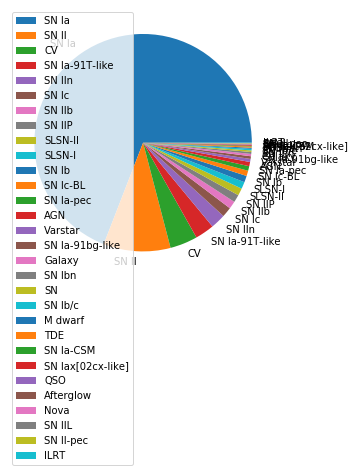

In [10]:
df_SN = all_alerce[classified_mask]["Obj. Type"].value_counts()
print(df_SN)
df_SN.plot.pie(y="count", figsize=(5, 5))
plt.axis("off")
plt.legend()

In [18]:
all_alerce.loc[classified_mask][(all_alerce[classified_mask]["Obj. Type"] == 'SN IIb')]

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,url
246,49753,SN 2019xct,00:38:50.125,-08:19:04.40,SN IIb,0.03000,SDSS J003849.83-081859.1,0.029000,"ALeRCE, ATLAS, ZTF","ZTF, ATLAS",...,1,1,NaN,18.7863,g-ZTF,2019-12-19 03:01:22.000,ALeRCE,NaN,NaN,http://alerce.online/object/ZTF19aczmnqy
279,49720,SN 2019xbm,13:07:13.988,+58:08:03.35,SN IIb,0.02600,UGC 08205,0.027713,"ALeRCE, ZTF",ZTF,...,1,1,NaN,19.5441,g-ZTF,2019-12-19 13:22:25.000,ALeRCE,NaN,NaN,http://alerce.online/object/ZTF19acyjjni
212,44660,SN 2019pqo,15:41:30.333,+15:47:03.30,SN IIb,0.01413,NGC 5980,0.013649,"ALeRCE, ATLAS","ZTF, ATLAS",...,1,1,NaN,18.6697,r-ZTF,2019-09-07 05:05:53.000,ALeRCE,NaN,NaN,http://alerce.online/object/ZTF19abxqppy


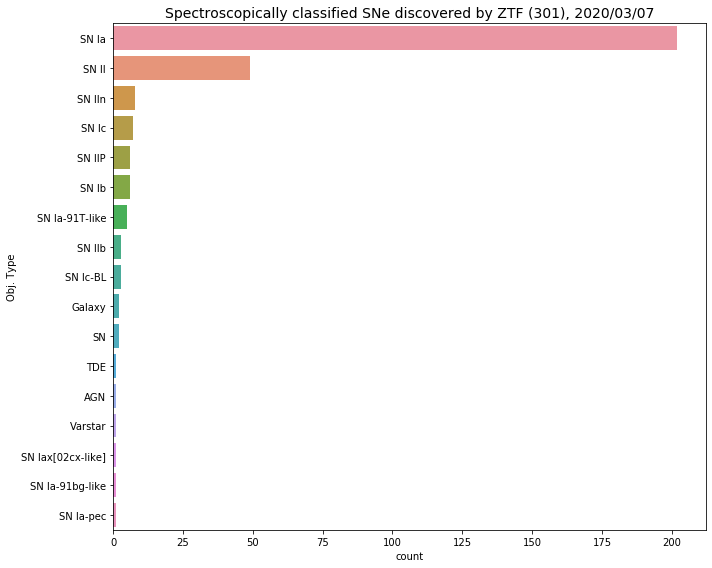

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
#sns.set(style="darkgrid")
counts = all_alerce[classified_mask]["Obj. Type"].value_counts()
sns.countplot(ax=ax, y="Obj. Type", data=all_alerce[classified_mask], order=counts.index)#cl[n.argsort()[::-1]])
ax.set_title("Spectroscopically classified SNe discovered by ZTF (%i), %s/%02i/%02i" % 
             (classified_mask.sum(), now.year, now.month, now.day), fontsize=14)
#ax.axvline(2.5, c = 'gray')
plt.tight_layout()
plt.savefig("ztf_plots/SN_types.png")

In [23]:
classified_oids = all_alerce[classified_mask]["Disc. Internal Name"].tolist()

In [24]:
oids = [oid for oid in sent if oid not in retracted]
oids = np.array(oids, dtype = str)

# Optional, use all SNe found, not just those in TNS

In [25]:
mode="tns" #'tns' 'all'
if mode == "all":
    oids = []
    for file in os.listdir("candidates"):
        if file[-3:] == 'txt':
            for oid in open("candidates/%s" % file, 'r').readlines():
                oids.append(oid[:-1])
    oids = np.array(oids)
    oids = np.unique(oids)
    oids = [oid for oid in oids if oid not in retracted]
    oids = np.array(oids, dtype = str)
elif mode=="tns":
    oids = [oid for oid in sent if oid not in retracted]
    oids = np.array(oids, dtype = str)

# Run all these cells if you want to update the results

In [26]:
alerce = AlerceAPI()

In [27]:
import json
credentials_file = "../usecases/alercereaduser_v2.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]

In [28]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [29]:
query = "select tablename from pg_tables where schemaname='public';"
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="tablename")

,tablename
9,asassn
18,class
10,crtsnorth
12,crtssouth
4,detections
23,early_classification_v2
16,features
22,features_v2
2,features_v3
24,ingestion_timestamp


In [30]:
alltabs = []
for tab in sorted(tables.tablename):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

,table,column_name,data_type
0,asassn,ASAS-SN Name,text
1,asassn,Other Names,text
2,asassn,LCID,integer
3,asassn,ra,double precision
4,asassn,dec,double precision
5,asassn,Mean VMag,double precision
6,asassn,Amplitude,double precision
7,asassn,Period,double precision
8,asassn,Type,text
9,asassn,Url,text


In [31]:
query='''
select objects.oid, objects.firstmjd, objects.nobs, objects.meanra, objects.meandec
from objects
where objects.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
SNe = pd.read_sql_query(query, conn)
SNe.set_index('oid', inplace=True)
SNe.head()

,firstmjd,nobs,meanra,meandec
oid,,,,
ZTF17aaaeqnb,58778.136979,1,19.895777,32.180523
ZTF17aabbxwa,58726.502940,14,80.039296,-17.944241
ZTF17aacqdhh,58846.554456,1,195.458248,43.968051
ZTF17aaddzyk,58803.209572,1,9.765071,-18.608218
ZTF18aaavffc,58789.514595,45,187.979824,32.544520


In [32]:
query='''
select oid, candid, mjd, fid, magpsf, sigmapsf, magpsf_corr, sigmapsf_corr
from detections
where detections.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
all_detections = pd.read_sql_query(query, conn)
all_detections.set_index('candid', inplace=True)
all_detections.head()

,oid,mjd,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr
candid,,,,,,,
936169913315015012,ZTF19abiijfy,58690.169919,2,19.698338,0.136072,19.698338,0.136072
936168984315015017,ZTF19abiiitl,58690.168981,2,19.884129,0.157709,19.884129,0.157709
936192433315015010,ZTF19abiijfy,58690.192431,1,19.795248,0.122960,19.795248,0.122960
937443201415015014,ZTF19abiovio,58691.443206,1,20.032164,0.174063,18.700192,0.078293
937371221415015020,ZTF19abiovio,58691.371227,2,20.146393,0.212616,19.115045,0.108332


In [33]:
query='''
select oid, fid, diffmaglim, mjd
from non_detections
where non_detections.oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
all_non_detections = pd.read_sql_query(query, conn)
all_non_detections.set_index('mjd', inplace=True)
all_non_detections.head()

,oid,fid,diffmaglim
mjd,,,
58660.232801,ZTF19abiijfy,2,20.829399
58663.190648,ZTF19abiijfy,2,20.358101
58663.211806,ZTF19abiijfy,1,20.739300
58666.171516,ZTF19abiijfy,2,19.855000
58666.209086,ZTF19abiijfy,1,20.780399


# Histogram of cadences

In [34]:
dts = []
dts_1st = []
dts_fid = []
for oid in all_detections.oid.unique():
    mask = (all_detections.oid == oid)
    times = np.sort(np.array(all_detections.loc[mask].mjd.unique()))
    if mask.sum() > 1:
        dts.append(times[1:] - times[:-1])
        dts_1st.append([times[1] - times[0]])
    for fid in [1, 2]:
        mask = (all_detections.oid == oid) & (all_detections.fid == fid)
        times = np.sort(np.array(all_detections.loc[mask].mjd.unique()))
        if mask.sum() > 1:
            dts_fid.append(times[1:] - times[:-1])
dts = np.concatenate(dts)
dts_1st = np.concatenate(dts_1st)
dts_fid = np.concatenate(dts_fid)

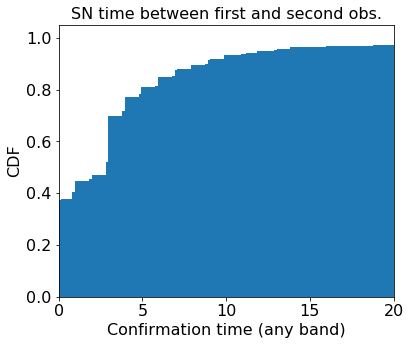

In [35]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts_1st, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Confirmation time (any band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN time between first and second obs.", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNconfirmation_any_%s.png" % mode)

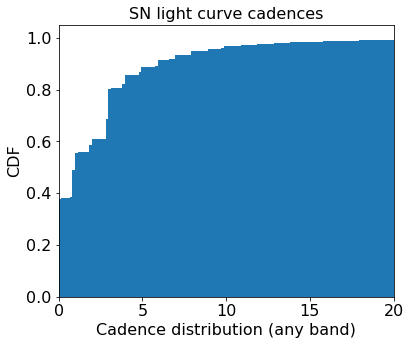

In [36]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Cadence distribution (any band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN light curve cadences", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNcadence_any_%s.png" % mode)

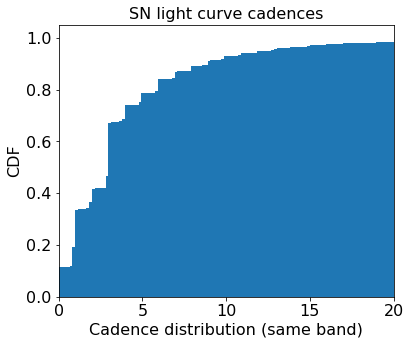

In [37]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(dts_fid, bins=1000, cumulative=True, density=True);
ax.set_xlim(0, 20)
ax.set_xlabel("Cadence distribution (same band)", fontsize=16)
ax.set_ylabel("CDF", fontsize=16)
ax.set_title("SN light curve cadences", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("ztf_plots/SNcadence_same_%s.png" % mode)

# Extract relevant features

In [38]:
nobs = []
dts = []
dt2s = []
dmags = []
dts_fid = []
dmags_fid = []
dmdt_fid = []
first_mjds = []
first_det_mags = []
max_mags = []
max_mjds = []
dt_first_max = []
dmag_first_max = []
ras = []; decs = []
reporting_date = []
reporting_time = []

ids_to_drop = []

for SN in oids:#["ZTF19abpsana"]:
    if SN in SNe.index:
        stats = SNe.loc[SN]
    else:
        print("#### skipping SN ####")
        ids_to_drop.append(SN)
        continue
    stats.dropna(inplace=True)
    detections = all_detections[all_detections.oid == SN]
    non_detections = all_non_detections[all_non_detections.oid == SN]
    try:
        nobs.append(int(stats.nobs))
    except:
        print("#### no stats ####")
        print(stats)
        ids_to_drop.append(SN)
        continue
    
    first_det_idx = detections.mjd.idxmin()
    first_det_mjd = float(detections.loc[first_det_idx].mjd)
    first_det_fid = int(detections.loc[first_det_idx].fid)
    first_det_mag = float(detections.loc[first_det_idx].magpsf)
    first_det_mags.append(first_det_mag)
    ras.append(stats.meanra)
    decs.append(stats.meandec)
    first_mjds.append(first_det_mjd)
    max_mjds.append(detections.loc[detections.magpsf.idxmin()].mjd)
    max_mags.append(detections.loc[detections.magpsf.idxmin()].magpsf)
    dt_first_max.append(max_mjds[-1] - first_mjds[-1])
    dmag_first_max.append(first_det_mags[-1] - max_mags[-1])
    
    mask = non_detections.index < first_det_mjd
    if np.sum(mask) > 0:
        last_non_det_mjd = np.array(non_detections.index[mask]).max()
        last_non_det_mag = non_detections.loc[last_non_det_mjd].diffmaglim
        if last_non_det_mag.shape != ():
            last_non_det_mag = last_non_det_mag.unique()[0]
        dts.append(first_det_mjd - last_non_det_mjd)
        dmags.append(last_non_det_mag - first_det_mag)
    else:
        dts.append(None)
        dmags.append(None)

    mask = (non_detections.index < first_det_mjd) & (non_detections.fid == first_det_fid)
    if np.sum(mask) > 0:
        last_non_det_fid_mjd = non_detections.index[mask].max()
        last_non_det_fid_mag = non_detections.loc[last_non_det_fid_mjd].diffmaglim
        if last_non_det_fid_mag.shape != ():
            last_non_det_fid_mag = last_non_det_fid_mag.unique()[0]
        dts_fid.append(first_det_mjd - last_non_det_fid_mjd)
        dmags_fid.append(last_non_det_fid_mag - first_det_mag)
        dmdt_fid.append(dmags_fid[-1] / dts_fid[-1])
    else:
        dts_fid.append(None)
        dmags_fid.append(None)
        dmdt_fid.append(None)
    
    if nobs[-1] > 1:
        second_det_mjd = detections.mjd[detections.mjd > first_det_mjd].min()
        dt2s.append(second_det_mjd - last_non_det_mjd)
    else: 
        dt2s.append(None)
        
    print(SN, nobs[-1], dts[-1], dt2s[-1], dmags[-1], dmags_fid[-1], dt_first_max[-1])
    

/home/rodrigo/anaconda3/envs/tf1/lib/python3.7/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


ZTF20aaskdgf 1 8.96976849999919 None 0.3145351409912003 0.528034210205 0.0
ZTF20aasmgqk 1 0.041782399799558334 None 1.3059978485106996 1.5618972778319993 0.0
ZTF20aasoaeu 1 13.047939799798769 None 0.8112297058106002 -0.403469085693299 0.0
ZTF20aaspdtp 1 0.9605324001968256 None 2.0342864990233984 1.68208694458 0.0
ZTF20aaskbht 1 7.998946799998521 None 0.27378654479980113 0.27378654479980113 0.0
ZTF20aaskeca 3 7.961296300098184 8.001886599799036 1.884962081909098 2.5586624145506995 0.0
ZTF20aasnzqi 1 13.047939799798769 None 1.4833812713623011 0.21268081665040128 0.0
ZTF20aasnzni 1 8.132326400198508 None 1.6818943023681001 1.9902935028075994 0.0
ZTF20aasohbn 1 12.895740699997987 None 0.011325836181697468 -2.4026756286621023 0.0
ZTF20aasosot 1 0.9261921001016162 None 1.4300022125244993 1.2013015747070988 0.0
ZTF20aasotla 1 0.1441318998040515 None 0.31354522705069954 0.7939434051512997 0.0
ZTF20aaspvan 1 0.03666669980157167 None 0.8016033172608026 -0.24409675598139913 0.0
ZTF20aasfafd 3 0.0

ZTF20aaqhjau 1 0.9803125000980799 None -1.621519088745103 -1.621519088745103 0.0
ZTF20aajckne 1 0.015000000195868779 None 0.3444461822509979 0.3444461822509979 0.0
ZTF20aaqglao 1 1.042546300101094 None 0.5141048431396982 0.2156047821044993 0.0
ZTF20aaqgivg 1 1.0416435001970967 None 0.09845542907720173 -0.08774375915519883 0.0
ZTF20aaqctut 1 4.915254599800392 None 1.9804515838623011 2.017351150512699 0.0
ZTF20aaqbach 12 0.9965162001026329 3.9158564999961527 0.4732952117919993 0.4732952117919993 14.966134299895202
ZTF20aaqbuqa 1 4.996724500095297 None 2.0741806030272976 2.0741806030272976 0.0
ZTF18aailiil 1 0.8847917000966845 None 0.8911781311034979 1.2926788330077983 0.0
ZTF20aaqaomr 1 0.9170602000012877 None 0.26313018798830257 0.36993026733400214 0.0
ZTF20aaqaeqs 1 0.9366202997989603 None 0.17755317687979755 0.17755317687979755 0.0
ZTF20aaqagdj 1 0.9581249999027932 None 0.909997940063402 0.909997940063402 0.0
ZTF20aapzryc 1 4.91348379990086 None 0.6841869354248011 0.47028732299810017 

ZTF20aamkyyx 14 4.800081000197679 4.840555500195478 1.091707229614201 1.091707229614201 6.10350689990446
ZTF20aammhhh 1 0.9651388998972834 None 0.7620754241942969 0.7620754241942969 0.0
ZTF20aammbrw 21 0.018159700201067608 0.064363400102593 -0.3027000427245987 -0.3027000427245987 9.940659699997923
ZTF20aamlfts 1 0.08237269990058849 None 0.36962318420410156 1.1107215881348012 0.0
ZTF20aamlerx 24 0.0676851999014616 0.07864580020395806 -0.38800048828129974 0.1420993804931996 27.0002661999024
ZTF20aamkoti 23 2.93649309999455 8.921574099796999 0.371391296386701 0.3572902679443004 0.0
ZTF18aaybfsd 27 2.910416699902271 3.000601900195761 1.2410888671875 1.2963886260986008 16.056573999994725
ZTF20aamkmea 2 2.902812500105938 29.96556720010267 0.4474811553955007 1.1652812957763992 0.0
ZTF20aamixdk 7 1.0125346998975147 12.957557799803908 -1.0675983428955007 -1.0675983428955007 11.945023099906393
ZTF20aamiqml 6 2.9780554998942534 3.0380323998979293 -0.2438030242919993 -0.2438030242919993 4.03975700

ZTF20aaigdiw 2 0.006215299901668914 2.999652800099284 0.16901397705069954 -1.2327861785889027 0.0
ZTF20aaifzlb 4 11.996412100103043 12.004652799805626 -0.4513912200927024 -0.4513912200927024 5.979942100100743
ZTF20aagmumq 6 18.979537100203743 21.98075239980244 -0.6301574707031996 None 3.0363425998948514
ZTF20aaifzfk 21 12.032395899899711 12.042881999797828 -0.007076263427698848 1.2789249420166016 32.98106480020215
ZTF20aaifyyy 10 9.020173600001726 9.032013900105085 0.6880664825440022 0.6880664825440022 3.021875000100408
ZTF20aaifzbr 14 12.030590300004405 12.042430600202351 -0.2921791076661009 1.2964210510254013 0.0
ZTF20aaifzcg 9 12.030590300004405 12.042430600202351 -0.8438758850097017 0.6626243591308985 3.0227777999971295
ZTF20aaifyln 8 12.026527800000622 12.047986099794798 -1.0303077697754013 None 3.0232060001944774
ZTF20aaifygl 3 18.97637730000133 21.977592499897582 -0.2478790283202983 None 3.0395022999000503
ZTF20aaifyrs 21 18.97637730000133 21.977592499897582 1.887344360351502 No

ZTF20aahbcpc 1 0.008449000000837259 None 0.7350673675537003 0.7350673675537003 0.0
ZTF20aahbcdq 33 3.8729629999943427 3.9703355999008636 0.368238449096598 0.2762374877928977 7.041423600203416
ZTF20aahbarr 1 3.8503125000934233 None 0.14758872985839844 0.48688888549810017 0.0
ZTF20aahbinh 2 3.9578009000979364 3.9933333001026767 -0.8702011108399006 -0.7074012756348012 0.03553240000474034
ZTF20aahbrbj 12 3.9389350998026202 3.9599189001019113 -0.45389938354490056 -0.25219917297360084 9.03284730019368
ZTF20aahbrfu 16 3.9389350998026202 3.9897338000009768 -0.17989921569819955 -0.009998321533199572 6.063692199997604
ZTF20aagzqsb 16 4.0466088001048774 7.060868099804793 -1.4633998870849005 1.5930004119872976 15.95486109979538
ZTF20aagzkni 13 3.96876160010288 4.021990700101014 -0.265687942504897 -0.05208778381349788 9.048680500098271
ZTF20aagzkoy 1 3.96876160010288 None -0.7865619659424006 -0.7729606628418004 0.0
ZTF20aagzkqi 1 0.008159800097928382 None -0.06835556030269885 -0.06835556030269885 0

ZTF20aafdfvn 2 1.9345716997995623 3.9306481002058717 -1.0298843383788991 -0.6000843048095987 1.9960764004063094
ZTF20aafdeza 11 2.957083299799706 12.96312499979831 0.42903518676759944 0.21303558349610086 12.997986100199341
ZTF20aafdarv 4 2.934363399799622 12.965382000096724 0.2949256896972976 0.1699256896972976 0.0
ZTF20aafdbbb 1 2.955046299895912 None -0.43682098388669743 -0.43682098388669743 0.0
ZTF20aafcmfi 14 1.0186340659856796e-10 8.035370399906242 0.04930114746090197 0.04930114746090197 10.849479199903726
ZTF20aafclqz 29 6.95789350020641 9.908472200004326 1.5980148315428977 1.5980148315428977 0.0
ZTF20aafcljq 22 4.938715299998876 7.896874999998545 1.6710300445556996 1.6599292755126989 2.958159699999669
ZTF20aafclxb 19 4.984027799902833 16.859548600099515 2.7701778411864986 3.3931770324706996 11.983483800198883
ZTF20aafcjln 18 4.920127300196327 16.85954859999765 2.974504470825199 2.974504470825199 11.939421299801324
ZTF20aaezglg 8 6.978958299900114 7.001018499999191 -0.39188003540

ZTF20aacevxq 33 0.011377299793821294 0.05032410019339295 0.37053489685060015 0.37053489685060015 14.987870400305837
ZTF20aacdhlf 4 14.00658570019732 17.006296300096437 -0.2379932403564986 -0.2379932403564986 2.9997105998991174
ZTF20aacdgek 3 None 17.021851899800822 None None 0.0
ZTF20aacdfep 8 None 17.005833400195115 None None 9.958819500105164
ZTF20aacdfpr 1 None None None None 0.0
ZTF20aacdans 11 None 16.9940740999009 None None 0.0
ZTF20aacctdf 1 None None None None 0.0
ZTF20aaccity 2 13.978530100204807 14.021678200100723 0.13369941711419742 -0.20890045166020244 0.04314809989591595
ZTF19adaqnob 14 0.9749073998027598 1.9711689000978367 -0.7598628997802983 -0.7598628997802983 42.816886499997054
ZTF20aacalzt 1 13.210069499902602 None -0.556396484375 0.39550399780269885 0.0
ZTF20aabqwsh 41 None 13.339594900098746 None None 2.006145900093543
ZTF20aabqwtz 56 None 13.339594900098746 None None 2.006145900093543
ZTF20aabqwzn 4 None 13.339594900098746 None None 0.0
ZTF20aabqxeg 15 19.443495300

ZTF19adcepgo 4 0.19284719999996014 3.17685179990076 -0.2407779693604013 -4.528078079223601 4.980138900195016
ZTF19adceoey 3 0.029791600201861 2.9844212999014417 -0.09036445617670097 -1.5667648315429012 2.9546296996995807
ZTF19adcejnq 39 6.984409700096876 7.002476800196746 -2.849016189575199 -3.7969160079956 9.850867999703041
ZTF19adccsjp 7 6.99030089990265 7.024155099905329 -3.537616729736399 0.125583648681598 2.959618100001535
ZTF19adcfjmv 2 0.04290510019927751 0.07685189980111318 -0.07970046997069957 -0.07970046997069957 0.033946799601835664
ZTF19adcednr 6 9.91694439999992 9.960451399900194 -0.06671905517569954 -0.20101737976069955 6.020231499795045
ZTF19adcecxf 46 7.952361099800328 8.046249999999418 -0.316608428955103 -0.316608428955103 6.086296300403774
ZTF19adcdzjm 27 7.889942100206099 7.943449099904683 -1.8417701721191015 -1.8417701721191015 13.908379699998477
ZTF19adcdxiq 29 7.9417129000939894 11.024317099792825 -0.8215656280518004 -0.8215656280518004 15.061990799898922
ZTF19adc

ZTF19adajqsp 3 5.973958400099946 19.937048600098933 0.33874702453610084 None 13.963090199998987
ZTF19adakacw 1 0.04587960020580795 None -0.015821456909201004 -1.4422225952149006 0.0
ZTF19acyjjni 26 0.04974540020339191 0.06392359990422847 0.5741863250731996 -0.49171257019040127 16.01706019970152
ZTF19acyjgtv 1 1.0746528000963735 None -0.7576141357422017 -0.6484146118165022 0.0
ZTF19aczjlnw 6 0.9260532002008404 0.9993981000006897 -0.4416217803955007 -0.4416217803955007 0.0
ZTF19aczildx 1 2.0364815001012175 None 1.0860366821288991 1.0860366821288991 0.0
ZTF19aczjytt 18 None 2.138715300199692 None None 64.79040509970218
ZTF19acyjzco 13 1.9246874999953434 1.9648611000011442 0.4444580078125 None 2.0150115001015365
ZTF19acxyrzw 11 12.923703699998441 12.942141200102924 -3.5394620895384996 0.7838382720948012 0.06493060009961482
ZTF19acyiqnw 62 21.035416700105998 21.094224599801237 3.1635341644287003 2.2071342468262003 5.002986100000271
ZTF19acytcsg 98 1.8833679999006563 5.893877299895394 0.8340

ZTF19acxpxwm 1 0.1067476999014616 None -0.5342464447020987 -1.8684463500976989 0.0
ZTF19acxpxax 1 0.095497700101987 None -0.35246467590339847 -0.17836380004889918 0.0
ZTF19acxpxkr 3 0.095497700101987 22.012060200002452 -0.6963729858397976 -0.35457229614249997 0.0
ZTF19acxpwlh 4 4.003645800003142 6.91464120009914 -0.9650688171387003 -1.9134674072266016 2.9109954000959988
ZTF19acxoywk 5 3.9076389002002543 4.0026736001018435 -0.4731845855712997 -0.4731845855712997 9.029722199797106
ZTF19acxoxry 7 3.9379628997994587 6.923275399800332 -0.776542663574201 -3.2925434112549006 0.0
ZTF19acxowwt 17 3.928738399903523 6.938217599905329 -2.520063400268601 -2.1953620910644993 6.043495399899257
ZTF19acxowop 13 3.922210599797836 7.04157399990072 -1.1213665008544993 0.9317340850830007 6.014872700405249
ZTF19acxnhts 3 3.9066550997958984 5.016574100198341 -0.5938186645508026 -2.743818283081101 0.0
ZTF19aafwrhf 15 6.781655099795898 6.878460600200924 -2.8763189315795987 1.0573806762694993 11.106168900201737

ZTF19actbsch 1 0.042661999897973146 None 0.40666961669930046 0.43867111206060017 0.0
ZTF19actbcdk 3 2.958391200103506 10.912997700099368 -0.0028553009032989962 0.1372432708741016 7.9834491000001435
ZTF19acrudqa 4 1.0885070000003907 8.003935200198612 -1.180988311767603 -1.180988311767603 0.0
ZTF19actaiwd 2 2.8657176000997424 9.861828700100887 -0.5077953338622976 0.06370544433590197 6.996111100001144
ZTF19actaiag 4 3.0061573998027598 11.02240740020352 0.9213123321533985 0.9213123321533985 8.01625000040076
ZTF19acsuqzf 3 1.0339930998015916 3.9423380000007455 -2.1891899108887003 -0.7817897796631001 2.908344900199154
ZTF19acstpgu 1 0.041469900199444965 None -0.6340503692626989 0.8588504791260014 0.0
ZTF19acstodq 2 0.05857630020182114 0.05903929979831446 -0.36084175109860084 -0.8892421722412003 0.0004629995964933187
ZTF19acstkvb 7 0.02550929989956785 0.9635416997989523 -0.9335613250731996 0.5122375488281996 8.906203700302285
ZTF19acstirm 4 0.05913190010323888 3.0035995001017 -0.2624664306639

ZTF19acnwelq 9 2.898090299895557 2.964479199894413 0.35919189453129974 0.35919189453129974 7.013634200200613
ZTF19acnwcbl 15 2.939386600002763 5.923669000003429 0.9684810638426988 1.136081695556598 23.00605319999886
ZTF19acnvnrb 1 0.8974420997983543 None 0.07066726684569957 0.07066726684569957 0.0
ZTF19acokzjy 21 2.9965624999967986 3.000092599999334 0.4671821594238992 0.4671821594238992 9.026770799900987
ZTF19acnqqhl 1 0.001400399996782653 None 0.36793327331540127 0.36793327331540127 0.0
ZTF19acnqiwk 1 0.04182870020304108 None -0.7542934417724005 -1.0312919616699006 0.0
ZTF19acnqbby 6 1.9927545999962604 2.9965624999967986 0.23935890197749998 0.23935890197749998 10.00944449990493
ZTF19acnpwsd 2 5.985960600199178 10.003900400100974 -0.5496425628662003 -0.5496425628662003 0.0
ZTF19acnpuem 6 2.994953699904727 3.025011499899847 -0.03694152832029829 -0.03694152832029829 0.03005779999512015
ZTF19acnpuhp 2 2.994953699904727 6.002777699803119 -0.5750808715819993 -0.5750808715819993 0.0
ZTF19acn

ZTF19acjtpmm 9 4.002858800202375 8.011805599802756 0.8277549743651988 0.8277549743651988 6.994594899901131
ZTF19acjtplk 2 4.0243403002023115 11.018935200103442 -0.4637737274169993 0.43222618103019883 6.994594899901131
ZTF19acjtkha 15 2.98070599980565 3.005370299804781 2.2371273040771023 2.2371273040771023 11.995544000099471
ZTF19acjtgxj 3 2.85939819990017 5.870243100100197 0.6085872650146023 0.05298805236819959 3.010844900200027
ZTF19acjjjub 3 5.981041599799937 12.111909699902753 0.06331253051759944 -0.03248596191399855 26.96004630020616
ZTF19acdajld 6 0.9879050999006722 4.998564800196618 -0.5504074096678977 -0.5504074096678977 13.019282400098746
ZTF18aaexyql 14 5.999120300097275 6.021284699898388 1.5943393707275 0.9637393951416016 5.999236099902191
ZTF19acjduan 18 3.0254977000004146 5.941018499797792 0.7341442108154013 0.7341442108154013 5.981400399898121
ZTF19acjdufa 15 5.955960699902789 8.917835699903662 0.5924987792968004 0.5924987792968004 2.961875000000873
ZTF19acjljwl 1 2.892997

ZTF19acgbkzr 36 3.003275399998529 7.0146180000010645 0.829786300659201 0.829786300659201 19.908495400100946
ZTF19acgkxep 16 2.990520800201921 3.0096874998052954 0.20428848266600141 -1.79421043396 19.920775499704177
ZTF19acgkpis 4 2.960416599897144 2.9670022997961496 -0.06372642517090199 -1.7697257995605007 0.006585699899005704
ZTF19acgkdxu 3 0.02480320010363357 7.984733800200047 0.11723327636720171 -0.8123664855956996 12.985185199897387
ZTF19acgkcdg 3 0.02344909979728982 4.005543999999645 0.3834228515625 -0.6099777221679972 3.9820949002023553
ZTF19acgkbde 1 6.028321700003289 None -0.3964080810545987 -0.8843078613281001 0.0
ZTF19acgkbou 1 2.9109259999968344 None 0.057811737060600166 0.06141090393069959 0.0
ZTF19acekkts 6 None 5.311527800098702 None None 0.0
ZTF19acdkzxk 8 None 11.311354200202913 None None 0.0
ZTF19acgjosf 64 None 11.311354200202913 None None 22.965891200103215
ZTF19acdlami 5 None 11.30817129999923 None None 0.0
ZTF19acdlafk 7 None 11.30817129999923 None None 0.0
ZTF19ac

ZTF19acdllyn 1 3.985983799895621 None 0.6064128875733026 0.41011238098150216 0.0
ZTF19acclzaw 10 3.0742361000011442 5.982094900202355 1.6686077117920028 1.8233070373535014 8.907997700000124
ZTF19abuyfwj 1 1.2098958001006395 None -0.04871749877930043 8.201599120027936e-05 0.0
ZTF19acdpmzy 1 1.2031945000999258 None 0.02660560607909801 0.02660560607909801 0.0
ZTF18abshmgx 1 0.020219900201482233 None 0.5016918182373011 0.380392074585 0.0
ZTF19acdqbvf 1 0.1096875001967419 None -0.3733024597168004 0.24939727783199928 0.0
ZTF19acdqkbu 1 1.235856400198827 None -0.3504199981688991 -0.5945205688476989 0.0
ZTF19acdqntr 1 0.035844899801304564 None 0.7152347564696981 0.34773635864259944 0.0
ZTF19acdrkbh 1 3.9788888999974006 None 0.02377319335939987 -0.26502799987790127 0.0
ZTF19acdrner 1 5.05505789979361 None 0.04127502441399855 0.04127502441399855 0.0
ZTF19acdtipi 1 2.9814699001944973 None -0.304512023925799 -0.304512023925799 0.0
ZTF19acbvdxt 1 2.988321800105041 None 0.2142200469971023 0.21422004

KeyboardInterrupt: 

In [38]:
new_oids = []
for oi in oids:
    if oi in ids_to_drop:
        continue
    else:
        new_oids.append(oi)

oids = new_oids
len(oids), len(nobs), len(dts), len(dt2s), len(dmags), len(dts_fid), len(dmags_fid), len(first_mjds), len(dt_first_max), len(ids_to_drop)

(8183, 8183, 8183, 8183, 8183, 8183, 8183, 8183, 8183, 192)

In [39]:
df = {'oid': oids, 'nobs': nobs, 'dt': dts, 'dt2': dt2s, 'dmag': dmags, 'dt_fid': dts_fid, 
      'dmag_fid': dmags_fid, 'first_mjd': first_mjds, 'first_det_mag': first_det_mags, 
      'ra': ras, 'dec': decs, 'dt_first_max': dt_first_max, 'dmag_first_max': dmag_first_max,
      'mag_at_max': max_mags, 'dmdt_fid': dmdt_fid}
df = pd.DataFrame(df)
df.head()

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid
0,ZTF20aaovpbz,5,3.024965,5.979005,-0.460400,3.024965,-0.460400,58895.380440,20.012300,162.922085,-10.647924,17.869699,0.800945,19.211355,-0.152200
1,ZTF20aaskdhj,2,8.967963,9.004398,1.611460,9.007500,1.835760,58913.141042,18.572840,74.783558,4.972718,0.036435,0.320192,18.252647,0.203804
2,ZTF20aaskblh,2,7.991655,8.040336,1.335119,7.991655,1.335119,58913.131655,18.300781,28.747990,39.426864,0.000000,0.000000,18.300781,0.167064
3,ZTF20aarbvey,5,5.915845,10.937442,0.787300,5.959363,1.091501,58900.127049,18.997999,90.574442,-26.727655,5.021597,0.031916,18.966084,0.183157
4,ZTF20aasjzhg,2,8.942477,8.985949,2.883730,8.974884,3.228231,58913.119630,17.130569,44.583247,40.923163,0.000000,0.000000,17.130569,0.359696


In [40]:
df.to_pickle("ztf_summary_%s.pkl" % mode)

# Start from here if you want to use available results

In [ ]:
mode = 'tns' #'tns'
df = pd.read_pickle("ztf_summary_%s.pkl" % mode)
df.set_index("oid", inplace=True)
df.head()

### Histogram of UT times of first detection

In [ ]:
df["first_UT"] = df.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.first_UT[df.first_UT < df.dt2], bins=20, alpha=0.3)
ax.hist(df.first_UT[df.first_UT >= df.dt2], bins=20, alpha=0.3)

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.first_UT, bins=20)
ax.set_xlabel("Discovery UT [hr]", fontsize=16)
ax.set_ylabel("N", fontsize=16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/discovery_UT.png")

print(np.mean(df.first_UT), np.std(df.first_UT))

### Histogram of RA DEC coordinates

In [ ]:
import ephem

In [ ]:
df["ecl_lat"] = df.apply(lambda row: np.rad2deg(ephem.Ecliptic(ephem.Equatorial('%s' % (row.ra / 15.), '%s' % row.dec, epoch=ephem.J2000)).lat), axis=1)

In [ ]:
fig, ax = plt.subplots()
mask = df.nobs == 1
ax.hist(df.ecl_lat[mask], bins=30, label="1 det.", alpha=0.5, density=True)
ax.hist(df.ecl_lat[~mask], bins=30, label=">1 det.", alpha=0.5, density=True)
ax.legend()
ax.set_xlabel("Ecliptic latitude [deg]", fontsize=16)
ax.set_ylabel("N", fontsize=16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE, %i/%02i/%02i" % 
                 (now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/discovery_ecl_lat.png")


### Cumulative distribution of MJD times

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
x, y, _ = ax.hist(df.first_mjd, bins = np.linspace(df.first_mjd.min(), df.first_mjd.max(), df.first_mjd.max() - df.first_mjd.min() + 1), cumulative = True, label="1 detection")
ax.set_xlabel("Detection time [MJD]", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("Cumulative number of reported SNe", fontsize = 16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE to TNS (average %.1f SN/day), %i/%02i/%02i" % 
                 (len(oids) / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE (average %.1f SN/day), %i/%02i/%02i" % 
                 (df.shape[0] / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day), fontsize = 16)
ax.set_title("")
print("SNe identified by ALeRCE (average %.1f SN/day), %i/%02i/%02i" % 
                 (df.shape[0] / (df.first_mjd.max() - df.first_mjd.min()), now.year, now.month, now.day))
efficiency = 0.95
plt.savefig("plots/firstmjd.png")
ax.hist(df[df.nobs > 1].first_mjd, bins = np.linspace(df.first_mjd.min(), df.first_mjd.max(), df.first_mjd.max() - df.first_mjd.min() + 1), cumulative = True, label=">1 detection")
ax.plot((y[:-1] + y[1:]) / 2, x * efficiency, c = 'k', label="%i%% of 1 detection cumulative" % (efficiency * 100.), lw=4)
ax.legend(fontsize=16)
plt.tick_params(labelsize=14)
plt.xlim([df.first_mjd.min(), df.first_mjd.max()])
plt.savefig("ztf_plots/firstmjd_efficiency_%s.png" % mode, bbox_inches="tight")
plt.savefig("ztf_plots/firstmjd_efficiency_%s.pdf" % mode, bbox_inches="tight")

print(len(df.first_mjd))
print(df.first_mjd.min(), df.first_mjd.max())

# Do mosaic of stamps

In [ ]:
def plot_stamp(self, oid, candid=None):
    'plot stamp in a notebook given oid. It uses IPython HTML.'

    # if candid is None, get minimum candid                                                                                                                                                                    
    if candid is None:
        candid = min(self.get_detections(oid).index)

    science = "http://avro.alerce.online/get_stamp?oid=%s&candid=%s&type=science&format=png" % (oid, candid)
    images="""                                                                                                                                                                                                 
    <div>ZTF oid: %s, candid: %s</div>                                                                                                                                                                         
    <div>&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                                                        
    Science                                                                                                                                                                                                    
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                   
    Template                                                                                                                                                                                                   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                                                                                                                                   
    Difference                                                                                                                                                                                                 
    <div class="container">                                                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    <div style="float:left;width:20%%"><img src="%s"></div>                                                                                                                                                    
    </div>                                                                                                                                                                                                     
    """ % (oid, candid, science, science.replace("science", "template"), science.replace("science", "difference"))
    display(HTML(images))


# Distribution of number of detections

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.nobs, bins = np.linspace(0, df.nobs.max(), df.nobs.max() + 1), cumulative = True)
ax.set_xlabel("Number of detections", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/nobs.png")

In [ ]:
fig, ax = plt.subplots(figsize = (14, 10))
sc = ax.scatter(df.first_mjd, df.dt_first_max, s = 10 * df.nobs, c = df.dmag_first_max)
cbar = fig.colorbar(sc)
cbar.set_label("mag det - mag peak", fontsize=16)
ax.set_xlabel("First detection MJD", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("Time between maximum and first detection", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/dt_first_max_firstMJD.png")

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.dt_first_max[df.first_mjd < df.first_mjd.max() - 20], bins = np.linspace(0, df.nobs.max(), df.nobs.max() + 1), cumulative = True)
ax.set_xlabel("Time between first detection and light curve maximum", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS between %i and %i" % (df.first_mjd.min(), df.first_mjd.max() - 20), fontsize = 16)
plt.savefig("ztf_plots/dt_first_mag.png")

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1), cumulative = True, label="1 detection")
ax.hist(df[df.nobs > 1].first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1), cumulative = True, label=">1 detection")
ax.legend(fontsize=16)
ax.set_xlabel("First detection magnitude", fontsize = 16)
ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("ztf_plots/mags.png")

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(df.dt[df.nobs > 1], alpha = 0.5, bins = np.linspace(0, 16, 17), label = "1st detection" )
ax.hist(df.dt2[df.nobs > 1], alpha = 0.5, bins = np.linspace(0, 16, 17), label = "2nd detection")
ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
print("Average time between 1st detection and last non-detection: %4.2f [days]" % np.mean(df.dt[df.nobs > 1]))
print("Average time between 2nd detection and last non-detection: %4.2f [days]" % np.mean(df.dt2[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt2[df.nobs > 1]))
ax.set_ylabel("N", fontsize = 16)
ax.legend(fontsize = 16)
if mode=="tns":
    ax.set_title("SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
elif mode=="all":
    ax.set_title("SNe identified by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
plt.savefig("ztf_plots/TimeSinceDetection_%s.png" % mode)
plt.savefig("ztf_plots/TimeSinceDetection_%s.pdf" % mode)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
bins = np.linspace(0, 16, 17)
print(df.dt[df.nobs > 1].values)
h1, _ = np.histogram(df.dt[df.nobs > 1].values, bins=bins)
h2, _ = np.histogram(df.dt2[df.nobs > 1].values, bins=bins)
width = 0.3
h1_x = bins - 0.15
h2_x = bins + 0.15
ax.bar(h1_x[0:-1], h1, width=width, label="1st detection")
ax.bar(h2_x[0:-1], h2, width=width, label="2nd detection")
plt.tick_params(labelsize=14)
ax.set_xticks(bins[:-1])

ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
print("Average time between 1st detection and last non-detection: %4.2f [days]" % np.mean(df.dt[df.nobs > 1]))
print("Average time between 2nd detection and last non-detection: %4.2f [days]" % np.mean(df.dt2[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt[df.nobs > 1]))
print("STD time between 2nd detection and last non-detection: %4.2f [days]" % np.std(df.dt2[df.nobs > 1]))
ax.set_ylabel("Number of candidates", fontsize = 16)
ax.legend(fontsize = 16)
#if mode=="tns":
#    ax.set_title("SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
#elif mode=="all":
#    ax.set_title("SNe identified by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day), fontsize = 16)
print("Title", "SNe reported by ALeRCE with at least two detections (%i), %i/%02i/%02i" % (np.sum(df.nobs > 1), now.year, now.month, now.day))
plt.savefig("ztf_plots/TimeSinceDetection_%s.png" % mode, bbox_inches="tight")
plt.savefig("ztf_plots/TimeSinceDetection_%s.pdf" % mode, bbox_inches="tight")

# Show number of SNe with a lower non-detection in the same filter within the last 25 hr

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
lasthr = 25.
mask = (df.dmag_fid.notna())  & (df.dmag_fid > 0.5) & (df.dt_fid <= lasthr / 24.) & (df.nobs > 1)
ax.hist(df.dmag_fid[mask], alpha = 1, bins=10)# cumulative=True)#,
        #label = "%s SNe @ %i/%02i/%02i" % (mask.sum(), now.year, now.month, now.day))#, cumulative=True)
#ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
#print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
#print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
#print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
#print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
#print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
#print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
#print("Median time between 1st detection and last non-detection: %4.2f [days]" % np.median(df.dt[df.nobs > 1]))
#print("Median time between 2nd detection and last non-detection: %4.2f [days]" % np.median(df.dt2[df.nobs > 1]))
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("N", fontsize = 16)
ax.set_title("SNe with non-detection within last %i hr of 1st detection in the same filter" % (lasthr), fontsize = 16)
#ax.legend(fontsize=16, loc = 1)
plt.savefig("plots/Deltamag.png")
plt.savefig("plots/Deltamag.pdf")
print(df.loc[mask & (df.dmag_fid > 1)].index)


fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df.dmag_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)
cbar = fig.colorbar(sc, ticks =[18, 18.5, 19, 19.5, 20])
cbar.set_label('Minimum magnitude', fontsize=16)
cbar.ax.tick_params(which='major',labelsize=16)
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("First detection magnitude", fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("plots/mag_dmag.png")

for oid in mask[mask].index:
    display(HTML("<a href='http://alerce.online/object/%s'> %s <a>" % (oid, oid)))

In [ ]:
mask =  (df.dmdt_fid.notna()) & (df.dmdt_fid > 0.5) & (df.dmdt_fid < 20) & (df.dmag_fid > 0.5)  & (df.nobs>1)
print(mask.sum())

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df.dmdt_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)
cbar = fig.colorbar(sc)#, ticks =[17, 17.18, 18.5, 19, 19.5, 20])
cbar.set_label('Minimum magnitude', fontsize=18)
cbar.ax.tick_params(which='major',labelsize=16)
ax.set_xlabel(r"$|\Delta m/ \Delta t|$   [mag/day]", fontsize = 18)
ax.set_ylabel("First detection magnitude", fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig("plots/dmdt.png")

for oid in mask[mask].index:
    display(HTML("<a href='http://alerce.online/object/%s'> %s <a>" % (oid, oid)))

In [ ]:
oid = 'ZTF19abueupg'#'ZTF19abvdgqo'
det = alerce.get_detections(oid, format='pandas')
nondet = alerce.get_non_detections(oid, format='pandas')
fig, ax = plt.subplots(figsize=(8,6))
colors = {1: 'g', 2: 'r'}
mjd0 = det.mjd.min()
for fid in [1, 2]:
    mask = det.fid == fid
    ax.errorbar(det.mjd[mask] - mjd0, det.magpsf[mask], yerr=det.sigmapsf[mask], marker='o', lw=0, elinewidth=1, c=colors[fid], label="%s mag" % colors[fid])
    mask = (nondet.fid == fid) & (nondet.index < det.mjd.min())
    ax.scatter(nondet.index[mask] - mjd0, nondet.diffmaglim[mask], marker='v', c=colors[fid], alpha=0.5, label="mag.lim. %s" % colors[fid])
ax.set_ylim(ax.get_ylim()[1], 18.3)
ax.set_xlim(-10, 20)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.tick_params(axis='y', which='major', labelsize=16)
ax.set_xlabel("Time since first detection [days]", fontsize=18)
ax.set_ylabel("mag", fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=16, loc=4)
plt.tight_layout()
plt.savefig("BestSN.png")

# Find distribution of time between detection and 5th detection in the same band

In [ ]:
mask = (df.nobs > 5)
dt_5th = {}
for oid in df[mask].index:
    mask = all_detections.oid == oid
    for fid in all_detections[mask].fid.unique():
        mask = (all_detections.oid == oid) & (all_detections.fid == fid)
        if mask.sum() == 0:
            continue
        fid_mjds = all_detections[mask].mjd.values
        if len(fid_mjds) > 4:
            if oid in dt_5th.keys():
                dt_5th[oid] = min(dt_5th[oid], fid_mjds[4] - df.loc[oid].first_mjd)
            else:
                dt_5th[oid] = fid_mjds[4] - df.loc[oid].first_mjd

In [ ]:
fig, ax = plt.subplots()
ax.hist(dt_5th.values(), bins=25)
print(np.percentile(np.array(list(dt_5th.values())), 5))
print(np.median(np.array(list(dt_5th.values()))))
print(np.percentile(np.array(list(dt_5th.values())), 95))
len(dt_5th)

In [ ]:
mask = (df.nobs > 5) & (df.dmag_fid > 0) & (df.dt_fid <= lasthr / 24.)
ax.hist(df.dmag_fid[mask].dropna(), alpha = 0.5, bins=20, label = "%s SNe @ %i/%02i/%02i" % (mask.sum(), now.year, now.month, now.day))
#ax.set_xlabel("Time between detection and last non-detection [days]", fontsize = 16)
#print("%i SNe reported (excluding %i retracted)" % (df.nobs.shape[0], len(retracted)))
#print("Average number of detections: %i" % np.average(df.nobs[df.nobs > 1]))
#print("Median number of detections: %i" % np.median(df.nobs[df.nobs > 1]))
#print("Fraction of candidates with >1 detections: %f" % (np.sum(df.nobs > 1) / df.nobs.shape[0]))
#print("SNe with time between 1st detection and last non-detection < 1 day: %i" % np.sum(df.dt[df.nobs > 1] < 1))
#print("SNe with time between 2nd detection and last non-detection < 1 day: %i" % np.sum(df.dt2[df.nobs > 1] < 1))
#print("Median time between 1st detection and last non-detection: %4.2f [days]" % np.median(df.dt[df.nobs > 1]))
#print("Median time between 2nd detection and last non-detection: %4.2f [days]" % np.median(df.dt2[df.nobs > 1]))
ax.set_xlabel("Last non-detection - detection magnitudes", fontsize = 16)
ax.set_ylabel("N", fontsize = 16)
ax.set_title("Rising SNe reported by ALeRCE, non-det. within last %i hr of 1st det. in same filter" % (lasthr), fontsize = 16)
ax.legend(fontsize=16, loc = 1)
plt.savefig("plots/Deltamag.png")
plt.savefig("plots/Deltamag.pdf")
print(df.loc[mask & (df.dmag_fid > 1)].index)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.models import ColumnDataSource, OpenURL, TapTool

output_notebook()

In [ ]:
df["nobs_t"] = 5 + df.nobs
df["dmdt"] = df.dmag_fid / df.dt_fid

In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 800,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://dev.alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

color_col = 'first_mjd'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df.first_mjd.min(), high=df.first_mjd.max())

x_col = 'dt_fid'
y_col = 'dmag_fid'
size_col = 'nobs_t'
p.circle(
    x_col,
    y_col,
    source = df,
    color = mapper,
    size = size_col,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (x_col, y_col, size_col, color_col))
show(p)


In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 1000,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

color_col = 'dmag_first_max'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df.dmag_first_max.min(), high=df.dmag_first_max.max())


x_col = 'first_mjd'
y_col = 'dt_first_max'
size_col = 'nobs_t'
p.circle(
    x_col,
    y_col,
    source = df,
    color = mapper,
    size = size_col,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (y_col, x_col, size_col, color_col))
show(p)


In [ ]:
from bokeh.palettes import Spectral10
from bokeh.palettes import Viridis256
from bokeh.transform import linear_cmap


p = figure(
    plot_width = 800,
    plot_height = 600,
    tools=('pan, wheel_zoom, box_zoom, reset, tap')
)
p.add_tools(HoverTool(tooltips="""
<div>
    <div><span style='font-size: 12px'>oid: @oid</span></div>    
    <div><span style='font-size: 12px'>nobs: @nobs</span></div>    
    <div><span style='font-size: 12px'>dt: @dt</span></div>    
    <div><span style='font-size: 12px'>dt2: @dt2</span></div>    
    <div><span style='font-size: 12px'>dt_fid: @dt_fid</span></div>
    <div><span style='font-size: 12px'>dmag_fid: @dmag_fid</span></div>
    <div><span style='font-size: 12px'>first_mjd: @first_mjd</span></div>
    <div><span style='font-size: 12px'>dmdt: @dmdt</span></div>

</div>
"""))

taptool = p.select(type = TapTool)
url = "http://dev.alerce.online/vue/object/@oid"
taptool.callback = OpenURL(url=url)

#sc = ax.scatter(df.dmdt_fid[mask], df.first_det_mag[mask], c = df.mag_at_max[mask], s=70)

mask =  (df.dmdt_fid.notna()) & (df.dmdt_fid > 0.2) & (df.dmdt_fid < 20) & (df.dmag_fid > 0.5)  & (df.nobs>1)
color_col = 'mag_at_max'
mapper = linear_cmap(field_name=color_col, palette=Viridis256,low=df[mask][color_col].min(), high=df[mask][color_col].max())

x_col = 'dmdt_fid'
y_col = 'first_det_mag'
size_col = 'dmag_first_max'
p.circle(
    x_col,
    y_col,
    source = df.loc[mask],
    color = mapper,
    size = 20,
    line_alpha = 0.6,
    fill_alpha = 0.6
)

p.xaxis.axis_label = x_col
p.yaxis.axis_label = y_col
p.title.text = ("%s vs %s (size: %s, color: %s)" % (x_col, y_col, size_col, color_col))
show(p)


In [ ]:
mask.sum()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.first_mjd, df.nobs)
ax.set_yscale("log")

In [ ]:
(df.dec < 30).sum() /  (df.dec < 90).sum()

In [ ]:
fig, ax = plt.subplots()
mask = df.dmag > 0
ax.hist(df.nobs[df.dec < 15], cumulative=True, alpha=0.5, label = "dec < 20")
ax.hist(df.nobs[df.dec < 30], cumulative=True, alpha=0.5, label = "dec < 30")
ax.hist(df.nobs[df.dec < 90], cumulative=True, alpha=0.5, label = 'all')
plt.legend()

# Obtain TNS stats (scrapping)

In [ ]:
#results = {}
#specs = {}
#for name in all_alerce.Name.values:
#    objname = name[3:]
#    print(objname, len(results))
#    url = "https://wis-tns.weizmann.ac.il/object/%s" % objname
#    response = requests.get(url)
#    results[objname] = re.findall("cell-time_received.>(.*?)<.*cell-user_name.>(.*?)<.*cell-source_group_name.>(.*?)<.*cell-discovery_date.>(.*?)<.*", response.text)[1:]
#    specs[objname] = re.findall("spectrum.*?cell-id.>.*?cell-obsdate.>(.*?)<.*cell-tel_inst.>(.*?)<.*cell-exptime.>(.*?)<.*cell-observer.>(.*?)<.*", response.text)[1:]

### Save results

In [ ]:
#import pickle
#with open('wis_results.pkl', 'wb') as handle:
#    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('wis_specs.pkl', 'wb') as handle:
#    pickle.dump(specs, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load results

In [ ]:
import pickle
results = pickle.load(open('wis_results.pkl', 'rb'))
specs = pickle.load(open('wis_specs.pkl', 'rb'))

In [ ]:
for SN in list(specs.keys()):
    if specs[SN] == []:
        del specs[SN]

In [ ]:
delta_report = []
delta_2ndreport = []
group_2ndreport = []
delta_clf = []
mjd_disc = []
for SN in results.keys():
    #if not SN in specs.keys():
    #    continue
    report_2nd = 1e99
    clf_date = 1e99
    if len(results[SN]) > 0:
        for r in results[SN]:
            report_day = Time(r[0].replace(" ", "T")).mjd
            disc_day = Time(r[3].replace(" ", "T")).mjd
            disc_group = r[1]
            if disc_group == "ALeRCE":
                first_detection = disc_day
                report_ALeRCE = report_day
                delta_report.append(report_day - first_detection)
                mjd_disc.append(disc_day)
                if SN in specs.keys():
                    if specs[SN] != []:
                        clf_day = Time(specs[SN][0][0].replace(" ", "T")).mjd
                        delta_clf.append(clf_day - first_detection)
            else:
                if report_day < report_2nd:# and disc_group[:3] == "ZTF" :
                    report_2nd = report_day
                    report_group = disc_group
    if report_2nd < 1e99:
        delta_2ndreport.append(report_2nd - first_detection)
        group_2ndreport.append((SN, report_group))
                
                
delta_report = np.array(delta_report)
delta_2ndreport = np.array(delta_2ndreport)
mjd_disc = np.array(mjd_disc)

In [ ]:
cl, n = np.unique(np.array(group_2ndreport)[:, 1], return_counts=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(cl, n)
plt.xticks(rotation=90)
ax.set_title("Sources of subsequent TNS reports")
plt.tight_layout()
plt.savefig("plots/OtherSources.png")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mjd_disc, delta_report)#, bins=100, cumulative=True);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
refmjd = 58696
ax.hist(delta_report[mjd_disc > refmjd] * 24., bins=1000, cumulative=True, density=True);
ax.set_title("Candidates submitted to TNS since %i/%02i/%02i (%i)" %
             (Time(refmjd, format='mjd').datetime.year,
              Time(refmjd, format='mjd').datetime.month,
              Time(refmjd, format='mjd').datetime.day,
              len(delta_report[mjd_disc > 58697])), fontsize=18)
ax.set_xlabel("Time between ZTF first detection and ALeRCE report to TNS [hr]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/Report_times.png")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(delta_2ndreport, bins=1000, cumulative=True, density=True);
ax.set_title("Candidates with 2nd report to TNS (%i)" % len(delta_2ndreport), fontsize=18)
ax.set_xlabel("Time between ALeRCE report to TNS and subsequent report [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/ALeRCE_vs_rest.png")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(delta_clf, bins=1000, density=True, cumulative=True);
ax.set_title("Candidates with spectroscopic classification (%i)" % len(delta_clf), fontsize=18)
ax.set_xlabel("Time between ALeRCE report to TNS and spec. classification [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
plt.savefig("plots/ALeRCE_classification.png")

In [ ]:
print(np.median(delta_report[mjd_disc > refmjd]))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(delta_report[mjd_disc > refmjd], bins=1000, density=True, alpha=0.5, cumulative=True, color = 'r', label='ALeRCE');
ax.hist(delta_2ndreport, bins=1000, density=True, alpha=0.5, cumulative=True, label='Other', color = 'gray');
ax.hist(delta_clf, bins=1000, density=True, alpha=0.5, cumulative=True, label='Spectra', color = 'b');
ax.axvline(np.median(delta_report[mjd_disc > refmjd]), c = 'r')
ax.text(np.median(delta_report[mjd_disc > refmjd]), 1.,
        " %.1f hr" % (np.median(delta_report[mjd_disc > refmjd]) * 24.), color = 'r', fontsize=20)
ax.axvline(np.median(delta_2ndreport), c = 'gray')
ax.text(np.median(delta_2ndreport), 1.,
        " %.1f days" % (np.median(delta_2ndreport)), color = 'gray', fontsize=20, rotation=90, ha = 'right')
ax.axvline(np.median(delta_clf), c = 'b')
ax.text(np.median(delta_clf), 1.,
        " %.1f days" % (np.median(delta_clf)), color = 'b', fontsize=20, rotation=90, ha = 'right')
ax.set_title("Candidates sent by ALeRCE", fontsize=18)
ax.set_xlabel("Time between first ZTF detection and report to TNS [days]", fontsize=18)
ax.set_ylabel("CDF", fontsize=18)
ax.set_xlim(0, 25)
ax.legend(fontsize=18, loc=4)
plt.savefig("plots/ALeRCE_Other.pdf")
plt.savefig("plots/ALeRCE_Other.png")

In [ ]:
list(zip(group_2ndreport, delta_2ndreport))

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(df.first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label="1 detection", density=True, alpha = 0.5, histtype='step', lw=2)
ax.hist(df[df.nobs > 1].first_det_mag, bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label=">1 detection", density=True, alpha = 0.5, histtype='step', lw=2)
ax.hist(all_alerce.loc[classified_mask]["Discovery Mag"], bins = np.linspace(df.first_det_mag.min(), df.first_det_mag.max(), df.nobs.max() + 1),
        cumulative = True, label="spectroscopically classified", density=True, alpha = 0.5, histtype='step', lw=2)
ax.legend(fontsize=16, loc=2)
ax.set_xlabel("First detection magnitude", fontsize = 16)
#ax.grid(which='both')
ax.set_ylabel("CDF", fontsize = 16)
ax.set_title("SNe reported by ALeRCE to TNS", fontsize = 16)
plt.savefig("plots/mags+clf.png")

In [ ]:
all_alerce["shortname"] = all_alerce.Name.apply(lambda x: x[3:])

In [ ]:
list(all_alerce)

# Do some statistics on ML classified objects

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [ ]:
#!pip install psycopg2-binary
import psycopg2

In [ ]:
import json
credentials_file = "../usecases/alercereaduser_v2.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]

In [ ]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [ ]:
query = "select tablename from pg_tables where schemaname='public';"
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="tablename")

In [ ]:
alltabs = []
for tab in sorted(tables.tablename):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

In [ ]:
query = "select * from class"
classes = pd.read_sql_query(query, conn)
classmapper = dict(zip(classes.name.tolist(), classes.id.tolist()))
classmapper

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ncl = 0
df_cl = {}
for cl in classmapper.keys():
    if cl in ["Other", "EB", "SNe", "AGN", "SN", "Variable Star", "Asteroid", "Bogus"]:
        continue
    ncl += 1
    print(cl)
    prob_name = "%s_prob" % cl.replace(" ", "")
    if cl == "AGN I":
        prob_name = "AGN-I_prob"
    elif cl == "EB/SD/D":
        prob_name = "EBSD/D_prob"
    elif cl == "EB/C":
        prob_name = "EBC_prob"
    elif cl == "Periodic/Other":
        prob_name = "Periodic-Other_prob"
    query='''
    select late_probabilities_v2."%s"
    from late_probabilities_v2 

    inner join objects
    on late_probabilities_v2.oid=objects.oid

    where objects.classrf=%i
    
    ''' % (prob_name, classmapper[cl])
    # notar que "SNIa_prob" is written between parenthesis, since this is a programatically defined column in SQL

    df_cl[prob_name] = pd.read_sql_query(query, conn)
    ax.hist(df_cl[prob_name][prob_name], histtype='step', cumulative=True, bins=20, lw=5, label=cl, alpha=0.8)
    ax.text(df_cl[prob_name][prob_name].max(), df_cl[prob_name].shape[0], cl, fontsize=18, rotation=45, va='bottom', ha='left')
ax.legend(fontsize=18)
ax.set_xlim(0, 1.2)
ax.set_yscale('log')
ax.set_xlabel("Probability")
ax.set_xlabel("CDF")
plt.savefig("plots/cumulative.png")    

In [ ]:
fig, ax = plt.subplots(nrows = len(df_cl.keys()), figsize=(12, 20), sharex=True)
for idx, cl in enumerate(df_cl.keys()):
    print(idx, cl, np.percentile(df_cl[cl][cl], 5.))
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 5.), c='g')
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 50.), c='r')
    ax[idx].axvline(np.percentile(df_cl[cl][cl], 95.), c='g')

    ax[idx].axvline(1/len(df_cl.keys()), c = 'k')
    ax[idx].hist(df_cl[cl][cl], density=True, bins=40, lw=5, label=cl, alpha=0.8)
    ax[idx].text(df_cl[cl][cl].max(), 1., " %s (%i)" % (cl, df_cl[cl].shape[0]), fontsize=18, va='bottom', ha='left')

#ax[-1].set_xlabel("probability")    

# Build histogram given probability cut

In [ ]:
class_order = ['AGN-I', 'Blazar', 'CV/Nova', 'LPV', 'SNIa', 'SNIbc', 'SNII', 'SNIIn',
               'SLSN', 'EBSD/D', 'EBC', 'DSCT', 'RRL', 'Ceph', 'Periodic-Other']

In [ ]:
for prob_lim in np.linspace(0, 1, 100):
    fig, ax = plt.subplots(figsize=(12, 10))

    counts = {}
    for idx, cl in enumerate(class_order[::-1]):
        cl = "%s_prob" % cl
        mask = df_cl[cl][cl] > prob_lim
        if mask.sum() > 0:
            counts[cl] = len(df_cl[cl][cl].loc[mask])
            ax.text(counts[cl], idx, counts[cl])
        else:
            counts[cl] = 1e-3

    ax.barh(range(len(counts.keys())), list(counts.values()))
    ax.set_xscale('log')
    ax.set_xlim(0.5, ax.get_xlim()[1])
    ax.yaxis.set_ticks(range(len(counts.keys())))
    ax.yaxis.set_ticklabels([x[:-5] for x in counts.keys()]);
    ax.set_title("Minimum probability: %.2f" % prob_lim)
    
    plt.savefig("histogram_minprob%.2f.png" % prob_lim)

In [ ]:
supernova = {
        "internal_name": "ZTF19abyikbv"
        }

# construct list of (key,value) pairs
json_data = [('api_key', (None, api_key)),
            ('data', (None, json.dumps(supernova)))]

json_url = url_tns_api + '/get/search'
response = requests.post(json_url, files = json_data)

objname = response.json()["data"]["reply"][0]["objname"]
data = {
        "objname": objname,
        "photometry": "1",
        "spectra": "0"
        }

# construct list of (key,value) pairs
json_data = [('api_key', (None, api_key)),
            ('data', (None, json.dumps(data)))]

json_url = url_tns_api + '/get/object'
response = requests.post(json_url, files = json_data)

groupname = response.json()["data"]["reply"]["source_group"]["group_name"]
photometry = response.json()["data"]["reply"]["photometry"]

# Extract data from TNS (API approach)

# Sandbox or real

In [ ]:
sandbox = False # True: test in sandbox, False: send to real website

# Get API key and url

In [ ]:
if sandbox:
    print("Getting API sandbox key...")
    api_key = open("API_sandbox.key", "r").read()
else:
    print("Getting API key...")
    api_key = open("API.key", "r").read()
    
if sandbox:
    url_tns_api="https://sandbox-tns.weizmann.ac.il/api"
else:
    url_tns_api="https://wis-tns.weizmann.ac.il/api"
    
if not sandbox:
    print("WARNING: submitting to real (not sandbox) TNS website")

In [ ]:
# function for changing data to json format
def format_to_json(source):
    # change data to json format and return
    parsed = json.loads(source, object_pairs_hook = OrderedDict)
    result = json.dumps(parsed, indent = 4)
    return result

In [ ]:
mask = all_alerce["Discovering Group/s"] != "ALeRCE"

In [ ]:
dtALeRCE = {}
telescope_2ndreport = {}

for name in all_alerce.loc[mask].Name.values:
    objname = name[3:]
    data = {
            "objname": objname,
            "photometry": "1",
            "spectra": "0"
            }

    # construct list of (key,value) pairs
    json_data = [('api_key', (None, api_key)),
                ('data', (None, json.dumps(data)))]

    json_url = url_tns_api + '/get/object'
    response = requests.post(json_url, files = json_data)

    groupname = response.json()["data"]["reply"]["source_group"]["group_name"]
    photometry = response.json()["data"]["reply"]["photometry"]
    
    times = []
    telescopes = []
    for i in photometry:
        if i["remarks"][:20] != "[Last non detection]":
            print("   ", objname, i["jd"], i["remarks"], i["telescope"]["name"])
            times.append(float(i["jd"]))
            telescopes.append(i["telescope"]["name"])

    try:
        times = np.array(times)
        telescopes = np.array(telescopes, dtype=str)
        idxsorted = np.argsort(times)
        times = times[idxsorted]
        telescopes = telescopes[idxsorted]
        dtimes = times - times[0]
        mask_rep = (dtimes > 0.5) # remove repetitions within the same night 
        dtimes = dtimes[mask_rep]
        telescopes = telescopes[mask_rep]
        dtALeRCE[objname] = dtimes[0]
        telescope_2ndreport[objname] = telescopes[0]
        print(objname, dtALeRCE[objname], telescope_2ndreport[objname])
        
        if telescope_2ndreport[objname] == "P48":
            print(times, telescopes)
    except:
        print("Error with object %s" % objname)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.hist(dtALeRCE.values(), bins=np.linspace(0, 20, 21));
ax.set_xlabel("Report time difference (other - ALeRCE) [days]", fontsize=16);
ax.set_ylabel("N", fontsize=16)
plt.savefig("plots/Reportdiff.png")